In [3]:
!pip install pathlib

In [4]:
!pip install django

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 16.5 MB/s eta 0:00:00


In [5]:
from django.urls import path
import pathlib
import os
import random

In [6]:
!pip install keras
!pip install matplotlib-venn

In [7]:
import pandas as pd
import numpy as np
import tensorflow as tf
import glob

from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Dropout,Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers.legacy import Adam
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint
import matplotlib.pyplot as plt
from keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img, img_to_array



In [ ]:
imgwidth =256
imgheight = 256
batchsize = 16


In [ ]:
TRAIN_DATA = "/content/drive/MyDrive/Weather_Prediction_Model/Train"
data_dir = pathlib.Path(TRAIN_DATA)

In [ ]:
Test_path = "/content/drive/MyDrive/Weather_Prediction_Model/Test"
Test_dir = pathlib.Path(Test_path)

In [ ]:
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
class_names

array(['cloudy', 'desert', 'green_area', 'water'], dtype='<U10')

In [ ]:
cloudyPath = os.path.join(data_dir,'cloudy')
desertPath = os.path.join(data_dir,'desert')
green_areaPath = os.path.join(data_dir,'green_area')
waterPath = os.path.join(data_dir,'water')

In [ ]:
imageCount = len(list(data_dir.glob('*/*.jpg')))
imageCount

2000

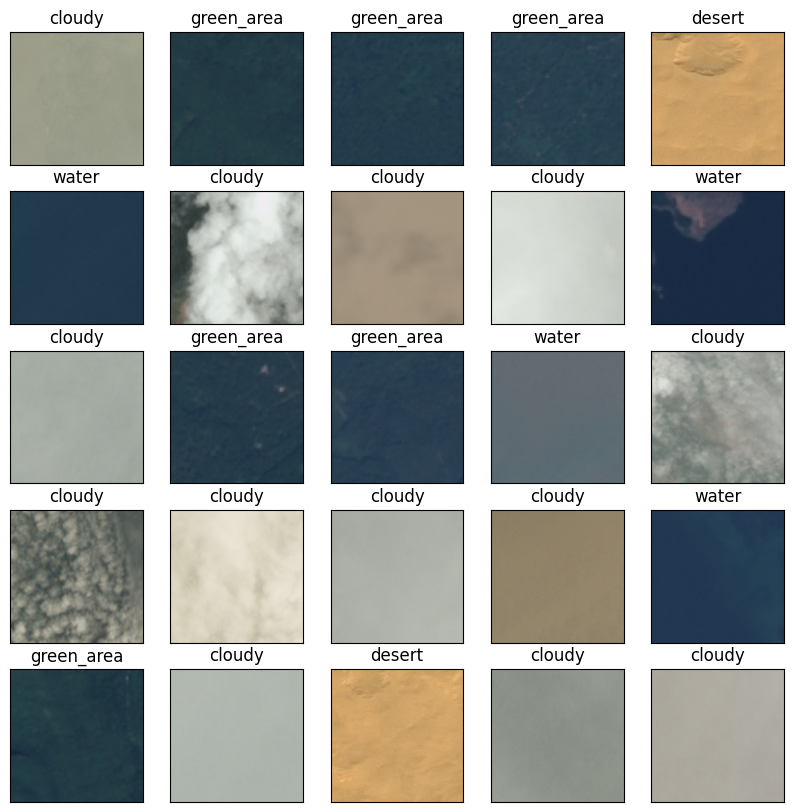

In [ ]:
plt.figure(figsize=(10,10))

for i in range(25):
    plt.subplot(5,5,i+1)
    random_class = random.choice(class_names)
    img = plt.imread(random.choice(list(data_dir.glob(random_class+"/*.jpg"))))
    plt.xticks([])
    plt.yticks([])
    plt.title(random_class)
    plt.imshow(img)

In [ ]:
from tensorflow.keras.utils import image_dataset_from_directory

train_data = image_dataset_from_directory(
                  data_dir,
                  validation_split=0.2,
                  subset="training",
                  seed=123,
                  image_size=(imgheight, imgwidth),
                  batch_size=batchsize)


val_data = image_dataset_from_directory(data_dir,
                                        validation_split=0.2,
                                        subset="validation",
                                        seed=123,
                                        image_size=(imgheight,imgwidth),
                                        batch_size=batchsize)

Found 2000 files belonging to 4 classes.
Using 1600 files for training.
Found 2000 files belonging to 4 classes.
Using 400 files for validation.


In [ ]:
best_model_file_path = "/content/drive/MyDrive/Weather_Prediction_Model/bestWeatherModel.h5"

In [ ]:
best_model = ModelCheckpoint(best_model_file_path,monitor = 'accuracy', verbose=1, save_best_only=True)

In [ ]:
from tensorflow.keras import layers
model = tf.keras.Sequential([
  layers.Rescaling(1./255, input_shape=(imgheight, imgwidth, 3)),

  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),

  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),

  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),

  layers.Dropout(0.5),
  layers.Flatten(),

  layers.Dense(128, activation='relu'),
  layers.Dense(4,activation="softmax")

])
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 256, 256, 3)       0         
                                                                 
 conv2d_9 (Conv2D)           (None, 256, 256, 16)      448       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 128, 128, 16)     0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 128, 128, 32)      4640      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 64, 64, 32)       0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 64, 64, 64)       

In [ ]:
model.compile(optimizer="Adam",
            loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
            metrics=["accuracy"])
epochs = 15
history = model.fit(train_data,
                    epochs=epochs,
                    validation_data=val_data,
                    batch_size=batchsize)

Epoch 1/15
100/100 [==============================] - 151s 1s/step - loss: 0.4368 - accuracy: 0.7631 - val_loss: 0.3679 - val_accuracy: 0.7975
Epoch 2/15
100/100 [==============================] - 156s 2s/step - loss: 0.3285 - accuracy: 0.8163 - val_loss: 0.3171 - val_accuracy: 0.7925
Epoch 3/15
100/100 [==============================] - 151s 2s/step - loss: 0.3046 - accuracy: 0.8394 - val_loss: 0.5183 - val_accuracy: 0.7900
Epoch 4/15
100/100 [==============================] - 149s 1s/step - loss: 0.2669 - accuracy: 0.8706 - val_loss: 0.2275 - val_accuracy: 0.9000
Epoch 5/15
100/100 [==============================] - 160s 2s/step - loss: 0.2497 - accuracy: 0.9031 - val_loss: 0.2386 - val_accuracy: 0.8875
Epoch 6/15
100/100 [==============================] - 160s 2s/step - loss: 0.1783 - accuracy: 0.9262 - val_loss: 0.1680 - val_accuracy: 0.9175
Epoch 7/15
100/100 [==============================] - 161s 2s/step - loss: 0.1783 - accuracy: 0.9269 - val_loss: 0.1568 - val_accuracy: 0.9350

In [ ]:
model.evaluate(val_data)

25/25 [==============================] - 10s 384ms/step - loss: 0.1634 - accuracy: 0.9225


[0.16339001059532166, 0.9225000143051147]

In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

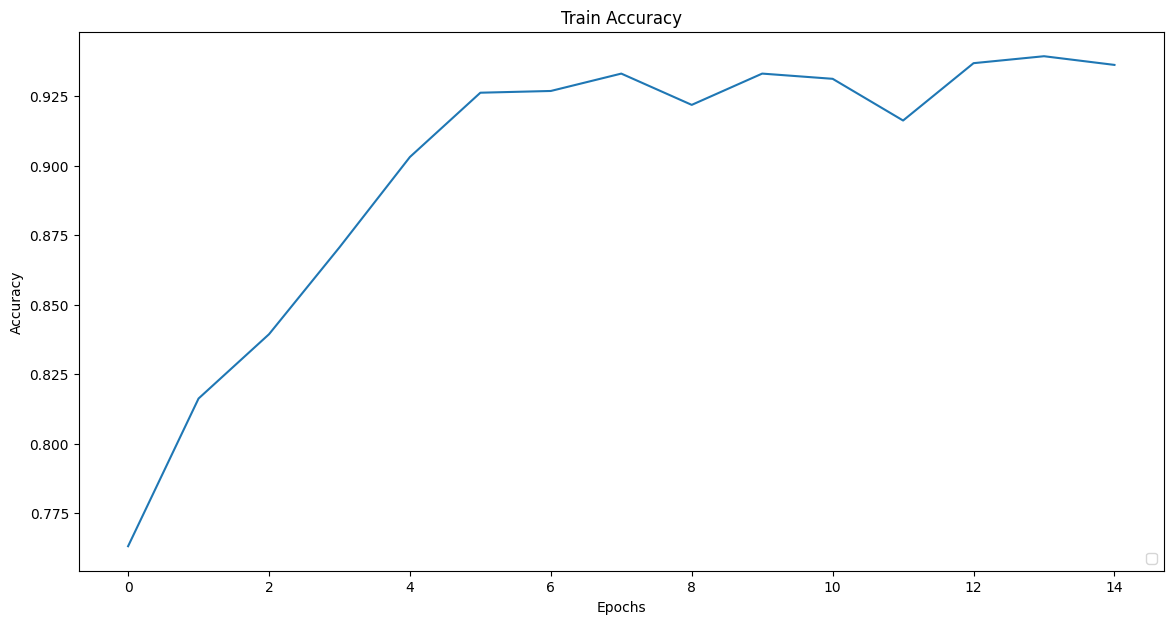

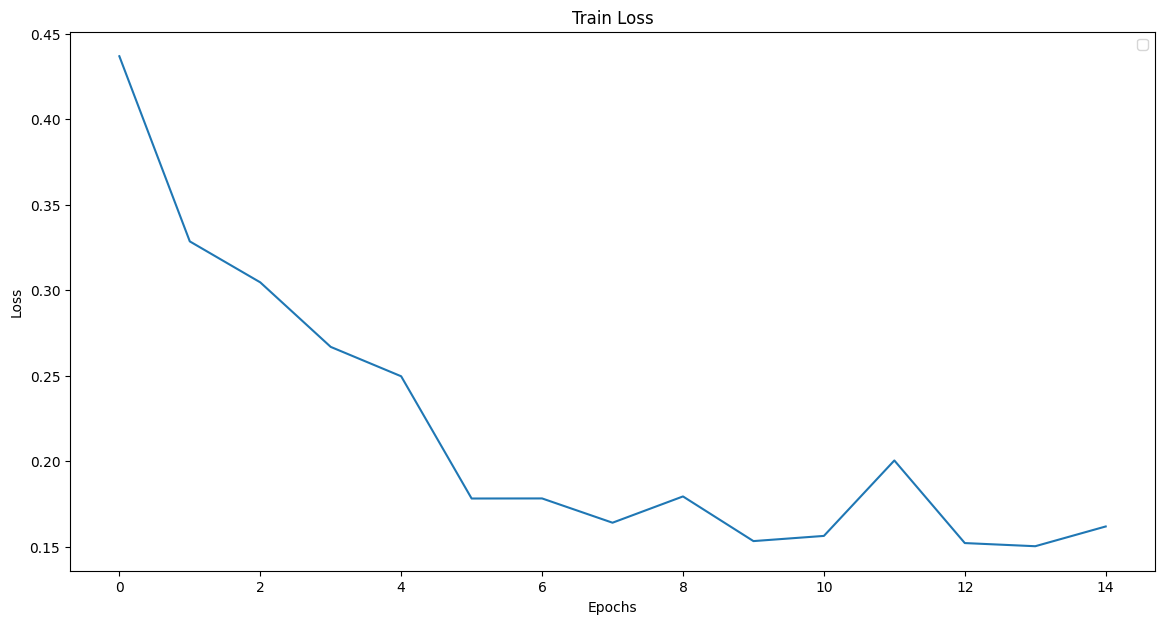

In [ ]:
#displaying the accuracy and loss chart

fig = plt.figure(figsize = (14,7))
plt.plot(history.history["accuracy"])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Train Accuracy')
plt.legend(loc = 'lower right')
plt.show()

fig = plt.figure(figsize = (14,7))
plt.plot(history.history["loss"])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Train Loss')
plt.legend(loc = 'upper right')
plt.show()



In [ ]:
 #saving the model in case there was no early stopping
 model.save('/content/drive/MyDrive/Weather_Prediction_Model/bestWeatherModel2.h5')

In [ ]:
classes = ["cloudy","desert","green_area","water"]


In [11]:
#load the saved model
model = tf.keras.models.load_model("/content/drive/MyDrive/Weather_Prediction_Model/bestWeatherModel.h5")
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 58, 58, 64)        3

In [ ]:
from PIL import Image

In [1]:
from tensorflow.keras.preprocessing import image  # Correct import statement

img_path = "/content/drive/MyDrive/Weather_Prediction_Model/Test/cloudy/train_39863.jpg"
test_image = image.load_img(img_path, target_size=(256, 256))
# Convert the image into an array
test_image = image.img_to_array(test_image)
print(test_image.shape)

(256, 256, 3)


In [9]:
#expand the array with another dimension
test_image = np.expand_dims(test_image,axis=0)
print(test_image.shape)

(1, 256, 256, 3)


In [22]:
#predict the category of an image
result = model.predict(test_image)
print(result)
if(result[0][1] == 1):
  result='cloudy'
  print(result)

1/1 [==============================] - 0s 88ms/step
[[0. 1. 0. 0.]]
cloudy
